[source code]:Exploratory data analysis.ipynb;Decision Trees and kNN.ipynb;Naive Bayes Spam.ipynb

1 Problem 1 [37 points]

The files for this problem are under the Experiment 1 folder. Datasets to be
used for experimentation: telecom churn.csv. Jupyter notebook to use as a
starting point: Exploratory data analysis.ipynb. In this experiment, we will
do exploratory data analysis to get a better sense of data. The dataset
contains record of telecom customer along with the label “churn”. Churn =
“true” signifies that the customer has left the company and churn = “false”
signifies that the customer is still loyal to the company. Answer the following
questions

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 2)
pd.set_option('display.max_columns', None)

1. How many records are there in the dataset?

In [2]:
df = pd.read_csv('telecom_churn.csv')
print(df.shape)

(3333, 21)


There are 3333 records in the dataset.

2. How many input features are there for classification? Name each feature and assign it as categorical, count, or continuous.

In [3]:
print(df.info())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

There are 20 input features for classification.

state: categorical

account length: count

area code: count

phone number: categorical

international plan: categorical

voice mail plan: categorical

number vmail messages

total day minutes: continuous

total day calls: count

total day charge: continuous

total eve minutes: continuous

total eve calls: count

total eve charge: continuous

total night minutes: continuous

total night calls: count

total night charge: continuous

total intl minutes: continuous

total intl calls: count

total intl charge: continuous

customer service calls: count

churn: categorical

3. For the continuous features, what is the average, median, maximum, minimum, and standard deviation values? Note that the 50 percentile value is same as the median.

In [4]:
df.describe(include=['float64'])

,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl charge
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,179.78,30.56,200.98,17.08,200.87,9.04,10.24,2.76
std,54.47,9.26,50.71,4.31,50.57,2.28,2.79,0.75
min,0.00,0.00,0.00,0.00,23.20,1.04,0.00,0.00
25%,143.70,24.43,166.60,14.16,167.00,7.52,8.50,2.30
50%,179.40,30.50,201.40,17.12,201.20,9.05,10.30,2.78
75%,216.40,36.79,235.30,20.00,235.30,10.59,12.10,3.27
max,350.80,59.64,363.70,30.91,395.00,17.77,20.00,5.40


total day minutes	total day charge	total eve minutes	total eve charge	total night minutes	total night charge	total intl minutes	total intl charge

average	179.78	30.56	200.98	17.08	200.87	9.04	10.24	2.76

std	54.47	9.26	50.71	4.31	50.57	2.28	2.79	0.75

min	0.00	0.00	0.00	0.00	23.20	1.04	0.00	0.00

median	179.40	30.50	201.40	17.12	201.20	9.05	10.30	2.78

max	350.80	59.64	363.70	30.91	395.00	17.77	20.00	5.40


4. What is the average number of customer service calls made by a customer to the com- pany?

In [5]:
df['customer service calls'].mean()

1.5628562856285628

1.56

5. What is the distribution of the class variable, “churn”? Calculate the probability of P(churn = True) and P(churn = False).

In [6]:
df['churn'].value_counts(normalize=True)

False    0.86
True     0.14
Name: churn, dtype: float64

P(churn = True)=0.14

P(churn = False)=0.86

6. What is the distribution of the feature, “international plan”? Calculate the probability of P(international plan = ’yes’) and P(international plan = ’no’).

In [7]:
df['international plan'].value_counts(normalize=True)

no     0.9
yes    0.1
Name: international plan, dtype: float64

P(international plan = ’yes’)=0.1

P(international plan = ’no’)=0.9

7. Assume you have devised a classification model that states that if “international plan” = ’no’, then the customer will not churn (i.e., churn = False). Report the accuracy of this classification model on the given dataset.

In [8]:
pd.crosstab(df['churn'], df['international plan'],normalize='columns')

international plan,no,yes
churn,,
False,0.89,0.58
True,0.11,0.42


Accuracy of 'if “international plan” = ’no’, then the customer will not churn (i.e., churn = False)' classification model on the given dataset is 0.89.

8. Calculate the following conditional probabilities:

    - P(churn = True | international plan = ‘yes’)

    - P(churn = False | international plan = ‘yes’)

    - P(churn= True | international plan = ‘no’)

    - P(churn = False | international plan = ‘no’)

Based on the probabilities computed above and those computed in parts 5 and 6, answer the following question using the Bayes theorem: “Given that a customer has churned (churn = True), what are the probabilities that the customer has opted/not-opted for the international plan? Similarly, given that the customer has not churned (churn = False), what are the probabilities that the customer has opted/not-opted for the international plan?”

P(churn = True | international plan = ‘yes’) = 0.42

P(churn = False | international plan = ‘yes’) = 0.58

P(churn= True | international plan = ‘no’) = 0.11

P(churn = False | international plan = ‘no’) = 0.89

P(international plan = ‘yes’ | churn = True) = P(churn = True | international plan = ‘yes’) * P(international plan = ‘yes’) / P(churn = True) = 0.42 * 0.1/ 0.14 = 0.3

P(international plan = ‘no’ | churn = True) = P(churn = True | international plan = ‘no’) * P(international plan = ‘no’) / P(churn = True) = 0.11 * 0.9 / 0.14 = 0.7

P(international plan = ‘yes’ | churn = False) = P(churn = False | international plan = ‘yes’) * P(international plan = ‘yes’) / P(churn = False) = 0.58 * 0.1 / 0.86 = 0.0674

P(international plan = ‘no’ | churn = False) = P(churn = False | international plan = ‘no’) * P(international plan = ‘no’) / P(churn = False) = 0.89 * 0.9 / 0.86 = 0.9314

9. Assume you have devised a classification model which states that if “international plan” = “yes” and the number of calls to the service center is greater than 3, then the customer will churn (i.e., “churn” = True). Report the accuracy of this classification model on the given dataset.

In [9]:
df['many_service_calls'] = (df['customer service calls'] > 3).astype('int')
pd.crosstab(df['many_service_calls'] & (df['international plan'] == 'yes') , df['churn'], margins=True)

churn,False,True,All
row_0,,,
False,2841,464,3305
True,9,19,28
All,2850,483,3333


In [10]:
accuracy=(19+2841)/3333
accuracy

0.858085808580858

The accuracy of "if “international plan” = “yes” and the number of calls to the service center is greater than 3, then the customer will churn (i.e., “churn” = True)" classification model on the given dataset is 0.86.

2 Problem 2 [23 points]

The files for this problem are under the Experiment 2 folder. Datasets to be used for
experimentation: telecom churn.csv. Jupyter notebook to be used as a starting point:
Decision Trees and kNN.ipynb. In this experiment we will apply and visualize decision
trees and kNN, finetune their hyper-parameters and learn about k-fold cross validation.
To visualize decision tree we need additional packages to be installed i.e., Graphviz and
pydotplus (check the Anaconda.org page for instructions on how to install them using
conda). Answer the following questions:

1. Consider training decision trees for the synthetic dataset involving two classes. How
does the decision boundary look like when we overfit ( max depth >= 4 ) and underfit
(max depth = 1) the decision tree on the given data? For both cases, paste the decision
tree and the decision boundary from Jupyter notebook output.

In [11]:
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [12]:
# first class
np.random.seed(17)
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# adding second class
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

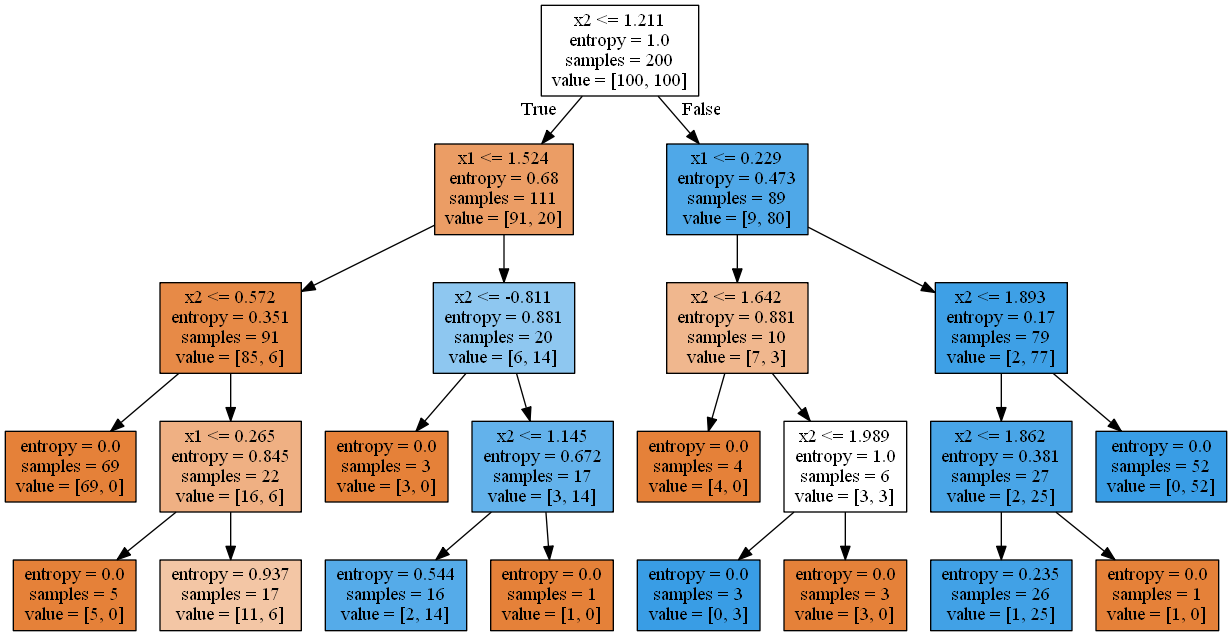

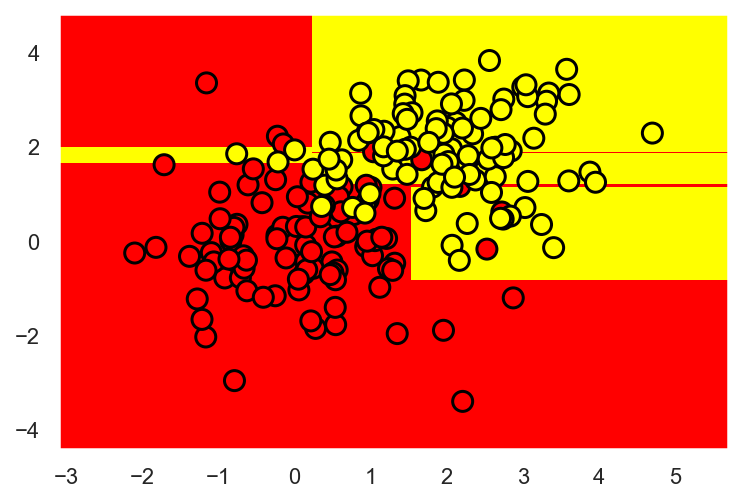

In [13]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus #To install this package, run: conda install -c anaconda pydotplus
from sklearn.tree import export_graphviz #To install this package, run: conda install -c anaconda graphviz

# Let’s write an auxiliary function that will return grid for further visualization.

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)
    
    
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


#For the assignment, you have to change max_depth parameter and re-run this cell 

clf_tree = DecisionTreeClassifier(criterion='entropy',max_depth= 4, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);


tree_graph_to_png(tree=clf_tree, feature_names=['x1', 'x2'], png_file_to_save='topic3_decision_tree_max_depth4.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "topic3_decision_tree_max_depth4.png"
Image(filename = PATH , width=900, height=600)

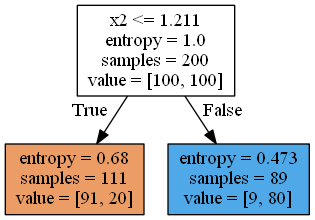

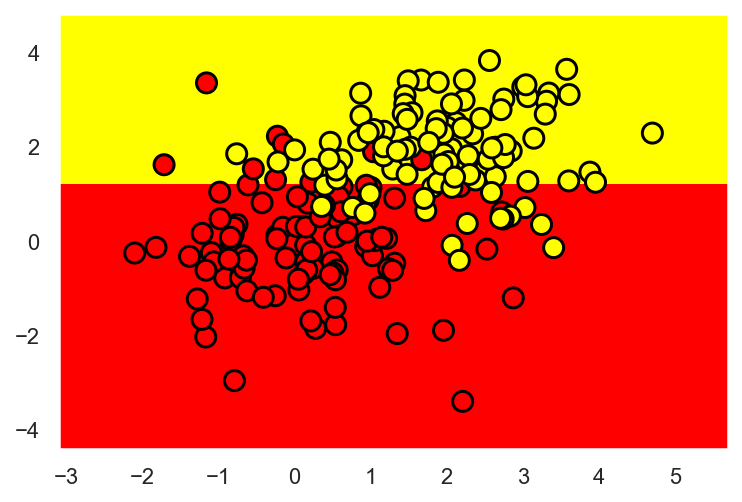

In [14]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus #To install this package, run: conda install -c anaconda pydotplus
from sklearn.tree import export_graphviz #To install this package, run: conda install -c anaconda graphviz

# Let’s write an auxiliary function that will return grid for further visualization.

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)
    
    
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


#For the assignment, you have to change max_depth parameter and re-run this cell 

clf_tree = DecisionTreeClassifier(criterion='entropy',max_depth= 1, random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);


tree_graph_to_png(tree=clf_tree, feature_names=['x1', 'x2'], png_file_to_save='topic3_decision_tree_max_depth1.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "topic3_decision_tree_max_depth1.png"
Image(filename = PATH , width=300, height=200)

When we overfit ( max depth >= 4 ) the tree "cuts" the space into 16 rectangles for max depth = 4, there are too many rectangle, even some small rectangle just to make the input meet the labels and when we underfit (max depth = 1) the tree "cuts" the space into 2 rectangles for max depth = 1 decision boundary is only a straight line, and many inputs are not in the area where they should be.

2. Decision tree classifier sklearn:tree:DecisionTreeClassifier has parameter "max depth"
which defines the maximum depth of the tree. What happens if we don't specify any
value for this parameter? Paste the decision tree and the decision boundary you will
obtain for this default case from Jupyter notebook output.

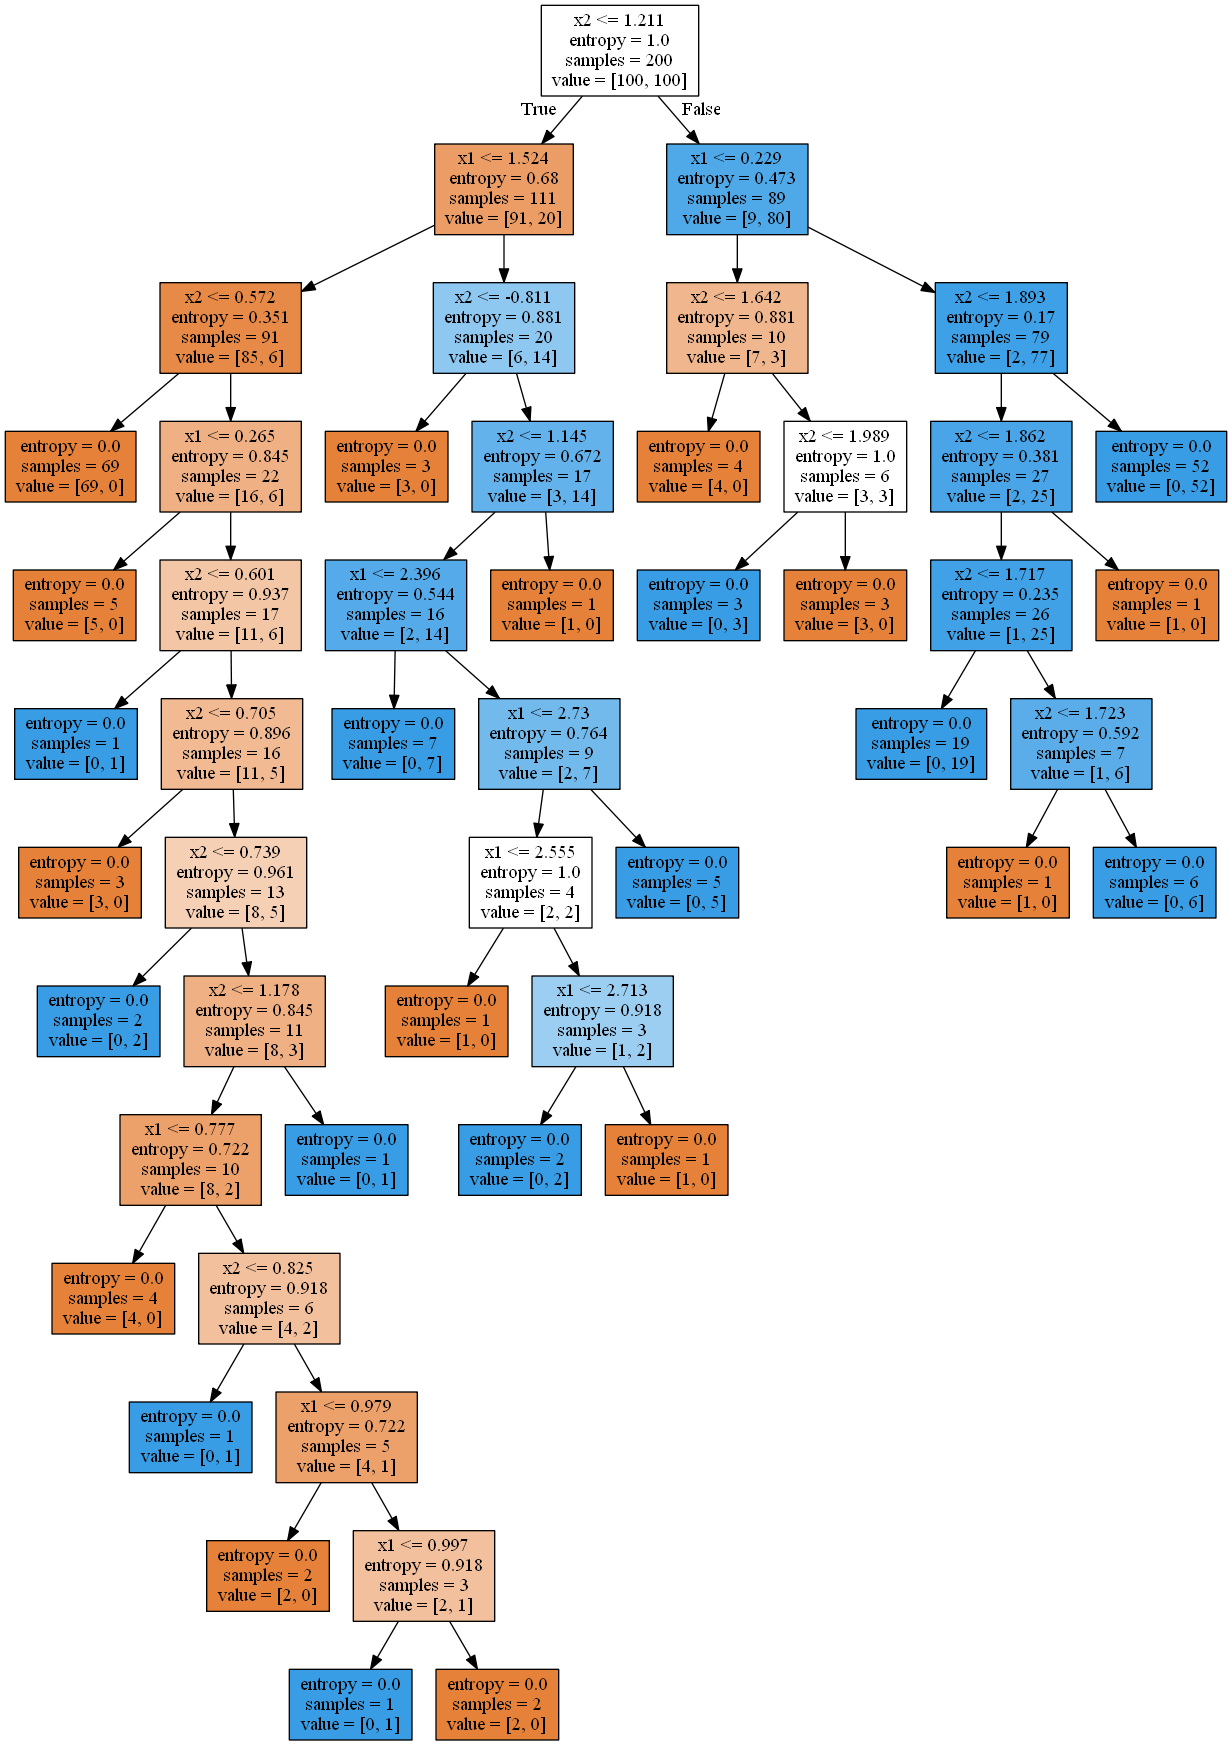

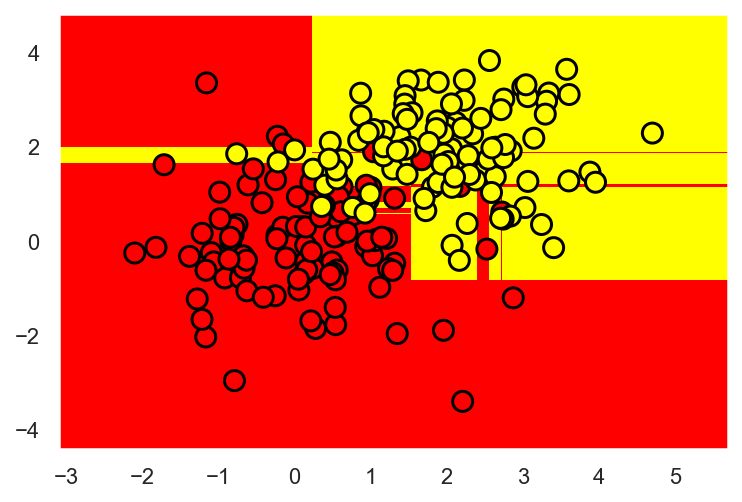

In [15]:
from sklearn.tree import DecisionTreeClassifier
import pydotplus #To install this package, run: conda install -c anaconda pydotplus
from sklearn.tree import export_graphviz #To install this package, run: conda install -c anaconda graphviz

# Let’s write an auxiliary function that will return grid for further visualization.

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, 
                                     filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)
    
    
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


#For the assignment, you have to change max_depth parameter and re-run this cell 

clf_tree = DecisionTreeClassifier(criterion='entropy', random_state=17)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);


tree_graph_to_png(tree=clf_tree, feature_names=['x1', 'x2'], png_file_to_save='topic3_decision_tree_no_max_depth.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "topic3_decision_tree_no_max_depth.png"
Image(filename = PATH , width=900, height=600)

If we don't specify any value for this parameter, there will be no upper limit to the depth.  The entropy of both left and right groups decreased. The process continues until no entropy decreased and the decision tree will have a large depth and lead to overfitting.

3. For Bank Dataset, what are the 5 different age values that the decision tree used to
construct the splits of the tree? What is the significance of these 5 values?

In [16]:
data = pd.DataFrame({'Age': [17,64,18,20,38,49,55,25,29,31,33],
                     'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})

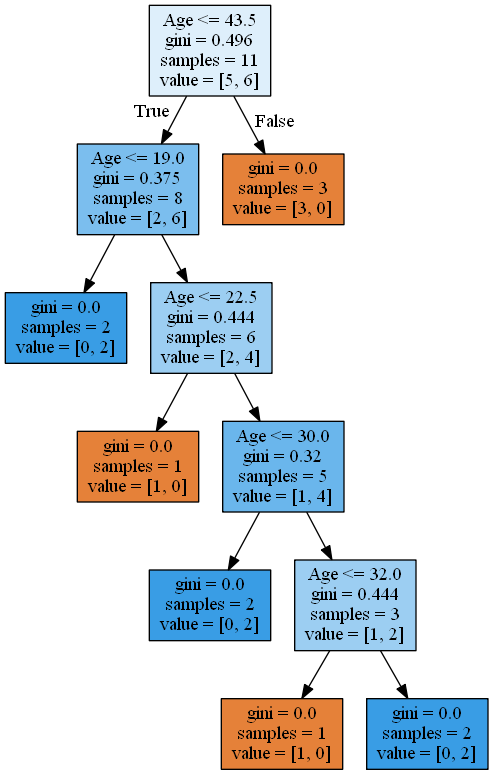

In [17]:
age_tree = DecisionTreeClassifier(random_state=17)
age_tree.fit(data['Age'].values.reshape(-1, 1), data['Loan Default'].values)

tree_graph_to_png(age_tree, feature_names=['Age'], 
                 png_file_to_save='topic3_decision_tree2.png')

from IPython.display import Image
from IPython.core.display import HTML 
PATH = "topic3_decision_tree2.png"
Image(filename = PATH , width=500, height=200)

The 5 different age values that the decision tree used to construct the splits of the tree: 43.5, 19, 22.5, 30, and 32 years.

These are exactly the mean values between the ages at which the target class "switches" from 1 to 0 or 0 to 1.

4. For the customer churn prediction task, we show that the accuracy of the decision tree
is 94% when max depth is set to 5. What happens to accuracy when we leave the value
of max depth to its default value? Explain the rise/fall of accuracy.

In [18]:
df = pd.read_csv('telecom_churn.csv')

df['international plan'] = pd.factorize(df['international plan'])[0]
df['voice mail plan'] = pd.factorize(df['voice mail plan'])[0]
df['churn'] = df['churn'].astype('int')
states = df['state']
y = df['churn']
df.drop(['state', 'churn','phone number'], axis=1, inplace=True)

In [19]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler

X_train, X_holdout, y_train, y_holdout = train_test_split(df.values, y, test_size=0.3,
random_state=17)

tree = DecisionTreeClassifier(random_state=17)

tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=17, splitter='best')

In [20]:
from sklearn.metrics import accuracy_score

tree_pred = tree.predict(X_holdout)
print (f" Accuracy for decision tree is {accuracy_score(y_holdout, tree_pred)}") 

 Accuracy for decision tree is 0.92


When we leave the value of max depth to its default value, the accuracy for decision tree is 0.92. Because the decision tree no longer has depth limitation and it will separate until no entropy decreased which lead to overfitting.

5. Given a dataset d, with n sample and m continuous features, what does Standard Scaler
sklearn:preprocessing:StandardScaler do? Given dataset d = [[0, 0], [0, 0], [1, 1], [1,
1]], write down its scaler transformation.

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
d  = [[0, 0], [0, 0], [1, 1], [1, 1]]
d_scaled = scaler.fit_transform(d)
d_scaled

array([[-1., -1.],
       [-1., -1.],
       [ 1.,  1.],
       [ 1.,  1.]])

The sklearn:preprocessing:StandardScaler will centering and scaling happen independently on each m features by computing the relevant statistics on the n samples in the training set.

6. How many decision trees do we have to construct if we have to search the two-parameter
space, max depth[1-10] and max features[4-18]? If we consider 10-fold cross-validation
with the above scenario, how many decision trees do we construct in total?

In [22]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params, cv=10, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 374 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   13.6s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': range(1, 11),
                         'max_features': range(4, 19)},
             pre_dispatch='2*n_

There are 150 decision trees we have to construct if we have to search the two-parameter space, max depth[1-10] and max features[4-18]. 

If we consider 10-fold cross-validation with the above scenario, 1500 decision trees we construct in total.

7. For the customer churn prediction task, what is the best choice of k[1-10] in the k-nearest
neighbor algorithm in the 10-fold cross-validation scenario?

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(1, 10)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
                        cv=10, n_jobs=-1, verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    1.4s finished


({'knn__n_neighbors': 9}, 0.8868409772824689)

The best choice of k[1-10] in the k-nearest neighbor algorithm in the 10-fold cross-validation scenario is 9.

8. For MNIST dataset, what was the accuracy of the decision tree [max depth = 5] and
K-nearest neighbor [K = 10]? What were the best hyper-parameter values and test
accuracy for decision trees when we used GridSearchCV with 5 fold cross-validation?

In [24]:
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X[0,:].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [25]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3,random_state=17)

In [26]:
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
knn_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('knn', KNeighborsClassifier(n_neighbors=10))])

tree.fit(X_train, y_train)
knn_pipe.fit(X_train, y_train);

In [27]:
tree_pred = tree.predict(X_holdout)
knn_pred = knn_pipe.predict(X_holdout)
print (f"K-Nearest neighbor accuracy is {accuracy_score(y_holdout, knn_pred)}")
print (f"Decision tree accuracy is {accuracy_score(y_holdout, tree_pred)}")

K-Nearest neighbor accuracy is 0.975925925925926
Decision tree accuracy is 0.6666666666666666


The accuracy of the decision tree [max depth = 5] is 0.66 and K-nearest neighbor [K = 10] is 0.97.

In [28]:
tree_params = {'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
               'max_features': [1, 2, 3, 5, 10, 20 ,30, 50, 64]}

tree_grid = GridSearchCV(tree, tree_params, 
                         cv=5, n_jobs=-1, verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 495 out of 495 | elapsed:    0.6s finished
C:\Users\ccjlj\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=17,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 5, 10, 20, 25, 30, 40, 50, 64],
                         'max_features': [1, 2, 3, 5, 10, 20, 3

In [29]:
tree_grid.best_params_, tree_grid.best_score_ 

({'max_depth': 20, 'max_features': 64}, 0.8440731901352426)

In [30]:
print (f"Decision tree accuracy is {accuracy_score(y_holdout,  tree_grid.predict(X_holdout))}") 

Decision tree accuracy is 0.8388888888888889


The best hyper-parameter values is max_depth= 20, max_features = 64; 

The test accuracy for decision trees when we used GridSearchCV with 5 fold cross-validation is 83.9%.

3 Problem 3 [10 points]

The files for this problem are under Experiment 3 folder. Datasets to be used for exper-
imentation: spam.csv. Jupyter notebook to be used as starting point: Naive Bayes
Spam.ipynb. The dataset contains 5,574 messages tagged according to ham (legitimate) or
spam. In this experiment we will learn about text features, how to convert them in matrix
form, and apply the Naive Bayes algorithm. Answer the following questions:

1. What is the distribution of the "label" class. Is it skewed?

In [31]:
import pandas
df_sms = pd.read_csv('spam.csv',encoding='latin-1')
df_sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
df_sms['length'] = df_sms['sms'].apply(len)

Text(0, 0.5, 'Frequency')

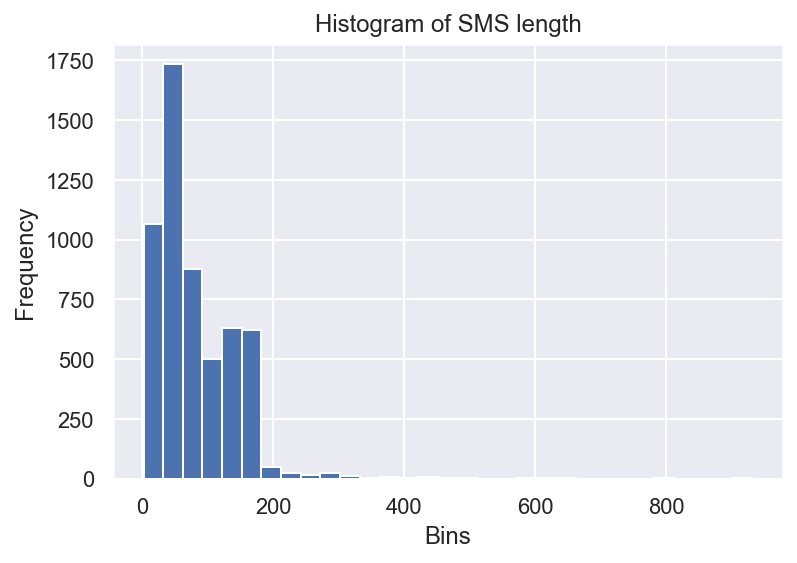

In [33]:
import matplotlib.pyplot as plt

data = list(df_sms['length'])
binsize = 30
plt.hist(data, bins=range(min(data), max(data) + binsize, binsize))

plt.title('Histogram of SMS length')
plt.xlabel("Bins")
plt.ylabel("Frequency")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001711CF7EB48>,
      dtype=object)

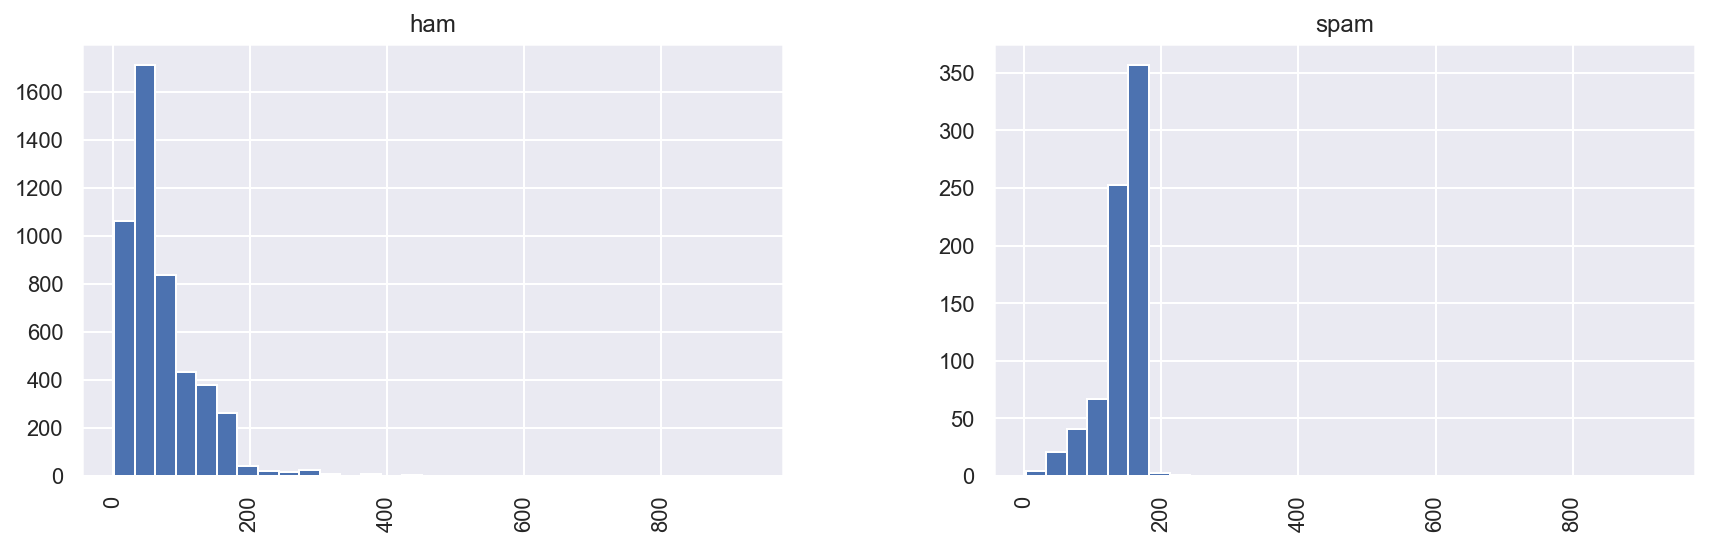

In [34]:
df_sms.hist(column='length', by='label', bins=range(min(data), max(data) + binsize, binsize),figsize=(14,4))

The distribution of the "label" class is skewed.

2. How many unique values of SMS are there in the dataset? What is the SMS that occurred
most frequently and what is its frequency?

In [35]:
df_sms = pd.read_csv('spam.csv',encoding='latin-1')
df_sms.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


There are 5169 unique values of SMS in the dataset. 

'Sorry, I'll call later' occurred most frequently and its frequency is 30.

3. What is the maximum and minimum length of SMS present in the dataset?

In [36]:
df_sms['length'] = df_sms['sms'].apply(len)
print (f"Maximum length of SMS is {max(df_sms['length'])}")
print (f"Minimim length of SMS is {min(df_sms['length'])}")

Maximum length of SMS is 910
Minimim length of SMS is 2


The maximum length of SMS present in the dataset is 910.

The minimum length of SMS present in the dataset is 2.

4. Plot the histogram of the length of SMS for both labels separately with bin size 5,
i.e. histogram of the length of all ham SMS and histogram of the length of all spam
SMS. What can you say about the difference in SMS lengths across the two labels after
examining the plots?

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001711D614588>,
      dtype=object)

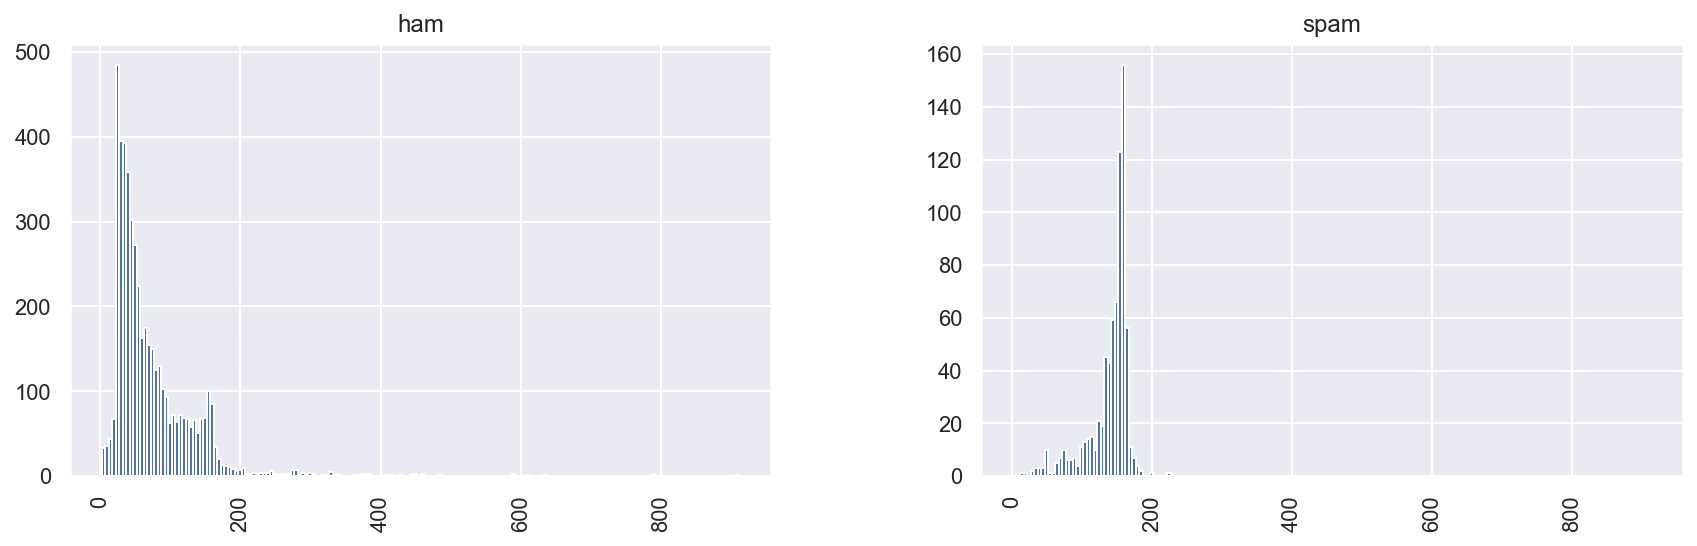

In [37]:
binsize = 5
df_sms.hist(column='length', by='label', bins=range(min(data), max(data) + binsize, binsize),figsize=(14,4))

The length of ham SMS is a right-skewed distribution. 

The length of spam SMS is a left-skewed distribution.

5. Using bag of words approach, convert documents = ['Hi, how are you?', 'Win money,
win from home. Call now.', 'Hi., Call you now or tomorrow?'] to its document-term
matrix.

In [38]:
documents = ['Hi, how are you?', 
             'Win money, win from home. Call now.', 
             'Hi. Call you now or tomorrow?']

lower_case_documents = []
lower_case_documents = [d.lower() for d in documents]
print(lower_case_documents)

['hi, how are you?', 'win money, win from home. call now.', 'hi. call you now or tomorrow?']


In [39]:
sans_punctuation_documents = []
import string

for i in lower_case_documents:
    sans_punctuation_documents.append(i.translate(str.maketrans("","", string.punctuation)))
    
sans_punctuation_documents

['hi how are you',
 'win money win from home call now',
 'hi call you now or tomorrow']

In [40]:
preprocessed_documents = [[w for w in d.split()] for d in sans_punctuation_documents]
preprocessed_documents

[['hi', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home', 'call', 'now'],
 ['hi', 'call', 'you', 'now', 'or', 'tomorrow']]

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [42]:
count_vector.fit(documents)
count_vector.get_feature_names()

['are',
 'call',
 'from',
 'hi',
 'home',
 'how',
 'money',
 'now',
 'or',
 'tomorrow',
 'win',
 'you']

In [43]:
doc_array = count_vector.transform(documents).toarray()
doc_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1]], dtype=int64)

In [44]:
frequency_matrix = pd.DataFrame(doc_array, columns = count_vector.get_feature_names())
frequency_matrix

,are,call,from,hi,home,how,money,now,or,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,1,1,0,1,0,1,1,0,0,2,0
2,0,1,0,1,0,0,0,1,1,1,0,1


6. Report accuracy, precision, recall and F1 score for the spam class after applying Naive
Bayes algorithm.

In [45]:
df_sms = pd.read_csv('spam.csv',encoding='latin-1')

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_sms['sms'], 
                                                    df_sms['label'],test_size=0.20, 
                                                    random_state=1)

In [47]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. 
testing_data = count_vector.transform(X_test)

In [48]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [49]:
#Make prediction on test dataset
predictions = naive_bayes.predict(testing_data)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision score: {}'.format(precision_score(y_test, predictions, pos_label ="spam")))
print('Recall score: {}'.format(recall_score(y_test, predictions, pos_label ="spam")))
print('F1 score: {}'.format(f1_score(y_test, predictions, pos_label ="spam")))

Accuracy score: 0.9847533632286996
Precision score: 0.9420289855072463
Recall score: 0.935251798561151
F1 score: 0.9386281588447652
